# THE SPARKS FOUNDATION

Task 1: Prediction using Supervised ML


Predict the perentage of students based on the no. of study hours

Created by: Amit Ghosh

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Sample Dataset: http://bit.ly/w-data

In [15]:
#Reading the Data
sh= pd.read_csv('http://bit.ly/w-data')

In [16]:
sh.head(5)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
sh.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [18]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There is no null valus in the dataset as we can visualize the data

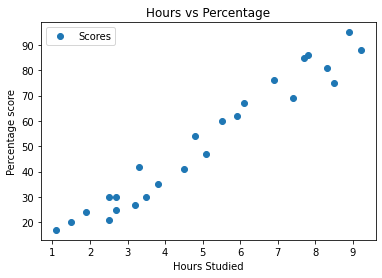

In [19]:
#Plotting the distribution of scores

sh.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage score')
plt.show()

In the above graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of scores

In [20]:
sh.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Splitting the Data

In [21]:
# Defining x and y from the Data
x=sh.iloc[:, :-1]
y=sh.iloc[:, 1].values

In [22]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [23]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,
                                                  test_size=0.2,random_state=13)

Training the Algorithm

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

Plotting the Regression Line

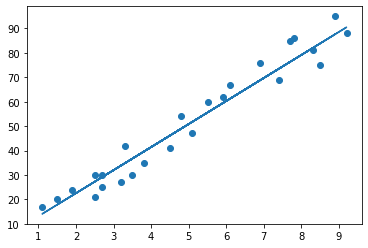

In [26]:
line= regressor.coef_*x+regressor.intercept_

#Plotting for the test data
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

Predicting the Percentage

In [27]:
print(x_test) #In Hours
y_pred = regressor.predict(x_test) #Predicting Scores

    Hours
8     8.3
24    7.8
1     5.1
11    5.9
15    8.9


Comparing Actual vs Predicted Marks

In [28]:
sh1=pd.DataFrame({'Actual':y_test,'Predicted': y_pred})
sh1

,Actual,Predicted
0,81,82.000031
1,86,77.280340
2,47,51.794008
3,62,59.345514
4,95,87.663660


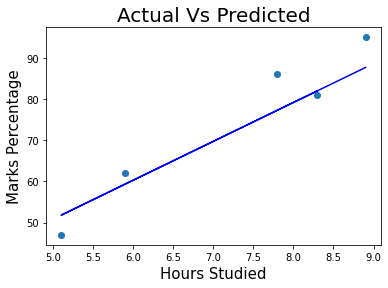

In [29]:
plt.scatter(x=x_test, y=y_test)
plt.plot(x_test,y_pred, color="Blue")
plt.title('Actual Vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()


In [30]:
hours =[9.25]
answer = regressor.predict([hours])
print('Score={}'.format(round(answer[0],3)))


Score=90.967


    Evaluating the Model

In [31]:
# Calculating the accuracy of the model

from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.90090496732433


Small value of Mean Absolute Error states that the chances of error or wrong forecasting through the model is very less

According to the regression model question, if a student studies for 9.25 hrs a day, he/she is likely to score 93.69 marks.